### import

In [1]:
import pandas as pd  # 데이터 처리 및 분석을 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import seaborn as sns  # 고급 시각화를 위한 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF 벡터화를 위한 클래스
from sklearn.metrics.pairwise import cosine_similarity  # 코사인 유사도 계산을 위한 함수
from sklearn.decomposition import NMF  # NMF(Non-Negative Matrix Factorization) 모델
from sklearn.cluster import KMeans  # K-Means 클러스터링 알고리즘
import numpy as np  # 수치 연산을 위한 라이브러리

In [2]:
!pip install konlpy
!apt-get install -y fonts-nanum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 101.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,693 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 120566 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4

### 변수 선언

In [3]:
file_path = 'mealkit_reviews_top20_emart.csv'  # 분석할 CSV 파일 경로

### 데이터프레임 생성

In [4]:
try:
    # CSV 파일을 읽어 데이터프레임으로 변환
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    print(df.head())  # 데이터프레임의 첫 5행 출력 (데이터 확인용)
except FileNotFoundError:
    # 파일이 존재하지 않을 경우 에러 메시지 출력
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    # 기타 에러 발생 시 에러 메시지 출력
    print(f"An error occurred: {e}")

   rating                                            content        date  \
0       5                   진짜 넘 맛있어요 떡이랑 팽이버섯 츄가해서 푸짐히 먹었어요  2024.10.09   
1       5  추천템이기도 하고 원래 동네에서 사먹던 밀키트와 가격대도 \n비슷한데 좀더 퀄러티가...  2024.11.27   
2       5        정해진시간에 잘 받았습니다 \n유통기한도 23,24일 괜찮게\n주셨네요\n굳굿  2025.01.20   
3       5                      자주 품절이라 구매못했는데 오늘은 운 좋게 구매했어요  2025.01.20   
4       5                               품절이 잘되는 부대찌개 아주 맛있어요  2025.01.19   

      product_id      product_name  rank  
0  1000604385774  송탄식 부대찌개 1.538kg     1  
1  1000604385774  송탄식 부대찌개 1.538kg     1  
2  1000604385774  송탄식 부대찌개 1.538kg     1  
3  1000604385774  송탄식 부대찌개 1.538kg     1  
4  1000604385774  송탄식 부대찌개 1.538kg     1  


In [5]:
df

rating                                            content        date  \
0           5                   진짜 넘 맛있어요 떡이랑 팽이버섯 츄가해서 푸짐히 먹었어요  2024.10.09   
1           5  추천템이기도 하고 원래 동네에서 사먹던 밀키트와 가격대도 \n비슷한데 좀더 퀄러티가...  2024.11.27   
2           5        정해진시간에 잘 받았습니다 \n유통기한도 23,24일 괜찮게\n주셨네요\n굳굿  2025.01.20   
3           5                      자주 품절이라 구매못했는데 오늘은 운 좋게 구매했어요  2025.01.20   
4           5                               품절이 잘되는 부대찌개 아주 맛있어요  2025.01.19   
...       ...                                                ...         ...   
22067       5                       빠른 배송 고맙습니다. 양도 많고 가격도 저렴했어요  2025.01.11   
22068       5                                    알차요 맛있어요 맛있어요~~  2025.01.07   
22069       5                   쓱배송으로 편리하게 주문하는 제품들입니다. 아주 좋아요^^  2025.01.02   
22070       5                      맛있어서 주문합니다. 매운 고추 하나 추가하면 좋아요  2024.12.31   
22071       4                                         빠른배송 감사합니다  2025.01.07   

          product_id      product_name  rank  
0      1000604385774  송탄식 부대찌개 1.538kg     1  
1      1000604385774  송탄식 부대찌개 1.538kg     1  
2      1000604385774  송탄식 부대찌개 1.538kg     1  
3      1000604385774  송탄식 부대찌개 1.538kg     1  
4      1000604385774  송탄식 부대찌개 1.538kg     1  
...              ...               ...   ...  
22067  1000634007730      영월식 청국장 930g    20  
22068  1000634007730      영월식 청국장 930g    20  
22069  1000634007730      영월식 청국장 930g    20  
22070  1000634007730      영월식 청국장 930g    20  
22071  1000634007730      영월식 청국장 930g    20  

[22072 rows x 6 columns]

### 테스트용 : 데이터프레임 대상 수 축소

In [6]:
# prompt: 데이터프레임 df 에서 df[product_id] 별 50개씩 랜덤하게 row 추출하여 데이터프레임 df 변수 재구성

# product_id 별로 50개씩 랜덤하게 샘플링
sampled_df = df.groupby('product_id').apply(lambda x: x.sample(n=min(50, len(x)))).reset_index(drop=True)

# 샘플링된 데이터프레임으로 df 재할당
df = sampled_df

# 결과 확인 (선택사항)
df

<ipython-input-6-0fbb3398c21e>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('product_id').apply(lambda x: x.sample(n=min(50, len(x)))).reset_index(drop=True)


rating                                            content        date  \
0         5                                         맛있게 잘 먹었어요  2023.11.26   
1         5                                      고생많으십니다.감사합니다  2021.11.19   
2         4        맛있어요,약간의 조미료 맛이 나지만 간편하게 한끼 뚜딱 하게 만들어먹기 좋아요  2023.01.27   
3         5                                순두부찌개 좋아해서 샀어요 맛있어요  2023.04.02   
4         4  개인적으론 약간 아쉬운 맛이었어요. 라면스프맛이 많이 나고, 야채가 많아서 일반 순...  2024.11.08   
..      ...                                                ...         ...   
906       5                      맛있어서 주문합니다. 매운 고추 하나 추가하면 좋아요  2024.12.31   
907       5                                     영월식 청국장 맛있습니다.  2025.01.20   
908       4                                         빠른배송 감사합니다  2025.01.07   
909       5                                         맛있게 잘 먹을께용  2025.01.17   
910       5  신제품이네요 오돌뼈는 크고 양도 많은데 주먹밥이 너무 달아요 그건만 개선되면 좋을 ...  2025.01.18   

        product_id      product_name  rank  
0    1000049359710   순두부찌개 요리재료 804g     5  
1    1000049359710   순두부찌개 요리재료 804g     5  
2    1000049359710   순두부찌개 요리재료 804g     5  
3    1000049359710   순두부찌개 요리재료 804g     5  
4    1000049359710   순두부찌개 요리재료 804g     5  
..             ...               ...   ...  
906  1000634007730      영월식 청국장 930g    20  
907  1000634007730      영월식 청국장 930g    20  
908  1000634007730      영월식 청국장 930g    20  
909  1000642504460  오돌뼈볶음&주먹밥세트 770g    19  
910  1000642504460  오돌뼈볶음&주먹밥세트 770g    19  

[911 rows x 6 columns]

### 분석 : 리뷰 길이 시각화

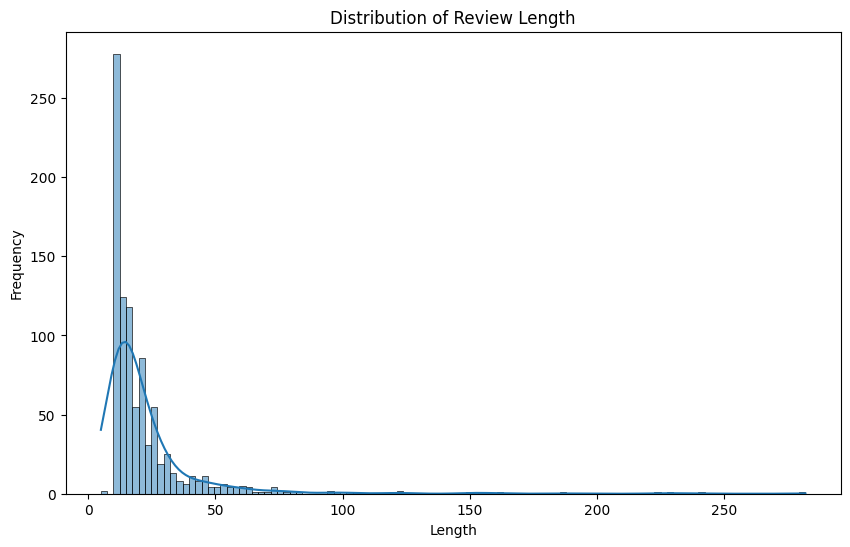

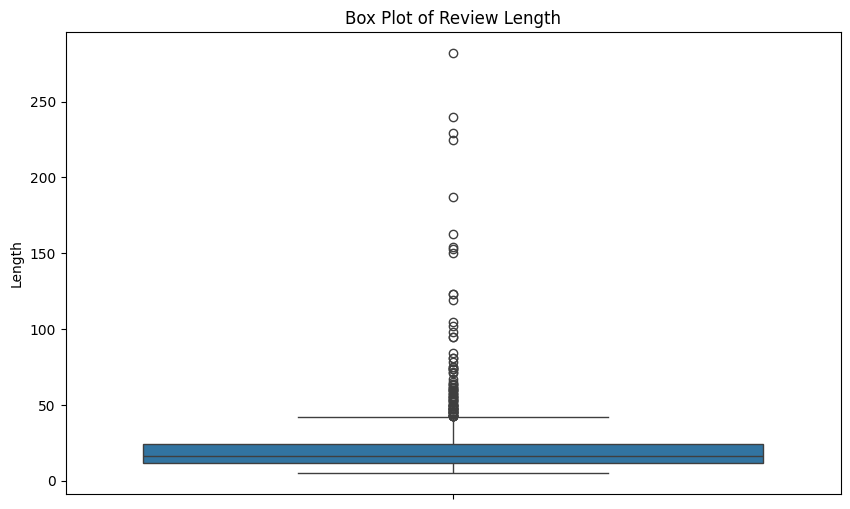

In [7]:
df['content_length'] = df['content'].str.len()  # 각 리뷰의 길이를 계산하여 새로운 열에 저장

# 리뷰 길이 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.histplot(df['content_length'], kde=True)  # 히스토그램과 커널 밀도 추정 그래프 그리기
plt.title('Distribution of Review Length')  # 그래프 제목 설정
plt.xlabel('Length')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()

# 리뷰 길이 분포를 박스 플롯으로 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.boxplot(y=df['content_length'])  # 박스 플롯 그리기
plt.title('Box Plot of Review Length')  # 그래프 제목 설정
plt.ylabel('Length')  # y축 레이블 설정
plt.show()

### 분석 : TF-IDF로 5개의 주제로 NMF를 사용한 토픽 모델링

In [8]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)  # TF-IDF 파라미터 설정
tfidf = vectorizer.fit_transform(df['content'])  # 리뷰 텍스트를 TF-IDF로 변환

# NMF 모델 학습
nmf = NMF(n_components=5, random_state=42)  # NMF 모델 초기화 (5개의 주제 설정)
nmf.fit(tfidf)  # TF-IDF 데이터를 사용하여 NMF 모델 학습

# 각 토픽별 주요 키워드와 가중치 추출
feature_names = vectorizer.get_feature_names_out()  # TF-IDF에서 추출된 키워드 리스트
for topic_idx, topic in enumerate(nmf.components_):  # 각 토픽에 대해 반복
    print(f"Topic #{topic_idx + 1}:")  # 토픽 번호 출력
    top_keywords_idx = topic.argsort()[:-21:-1]  # 각 토픽에서 상위 20개의 키워드 인덱스 추출
    top_keywords = [(feature_names[i], topic[i]) for i in top_keywords_idx]  # 키워드와 가중치 매칭
    for keyword, weight in top_keywords:  # 각 키워드와 가중치 출력
        print(f"  - {keyword}: {weight:.3f}")
    print()

# TF-IDF 점수를 기반으로 상위 50개 키워드 추출
tfidf_sums = tfidf.sum(axis=0)  # 각 단어의 TF-IDF 점수 합 계산
word_scores = [(word, tfidf_sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]  # 단어와 점수 매칭
sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)  # 점수 기준으로 정렬
top_50_keywords = sorted_word_scores[:50]  # 상위 50개 키워드 추출

# 상위 50개 키워드 출력
print("Top 50 keywords by TF-IDF sum:")
for word, score in top_50_keywords:
    print(f"- {word}: {score:.3f}")

Topic #1:
  - 좋아요: 2.637
  - 먹기: 0.197
  - 간편하게: 0.173
  - 만족합니다: 0.146
  - 간단하게: 0.131
  - 맛있게먹었어요: 0.116
  - 배송: 0.116
  - 빠르고: 0.100
  - 맛있어서: 0.076
  - 제품: 0.066
  - 가끔: 0.054
  - 배송도: 0.050
  - 잘받았습니다: 0.049
  - 저렴하고: 0.048
  - 구매합니다: 0.046
  - 추천합니다: 0.044
  - 있어서: 0.043
  - 상품: 0.043
  - 아주: 0.042
  - 가성비: 0.040

Topic #2:
  - 맛있어요: 2.215
  - 추천합니다: 0.173
  - 간편하고: 0.115
  - 너무: 0.108
  - ㅎㅎ: 0.106
  - 신선하고: 0.096
  - 양도: 0.091
  - 정말: 0.071
  - 만족합니다: 0.065
  - 아주: 0.055
  - 순두부: 0.053
  - 피코크: 0.052
  - 다음에: 0.051
  - 재구매: 0.046
  - 먹으니: 0.045
  - 넣어서: 0.044
  - 같아요: 0.042
  - 많고: 0.041
  - 감사합니다: 0.037
  - 알차요: 0.037

Topic #3:
  - 자주: 1.622
  - 구매하는: 1.129
  - 상품입니다: 0.774
  - 제품이에요: 0.190
  - 맛있어서: 0.159
  - 있어요: 0.127
  - 구매합니다: 0.108
  - 제품입니다: 0.107
  - 상품이예요: 0.092
  - 이용하는: 0.078
  - 너무: 0.078
  - 사는: 0.071
  - 구매해요: 0.065
  - 주문합니다: 0.060
  - 시켜먹습니다: 0.055
  - 구입해요: 0.049
  - 간단히: 0.048
  - 있습니다: 0.044
  - 맛나요: 0.044
  - 구매해서: 0.044

Topic #4:
  - 맛있게: 1.584
  - 먹었습니다

In [9]:
# 데이터프레임 크기 확인
df.shape

(911, 7)

### 분석 : 유사도

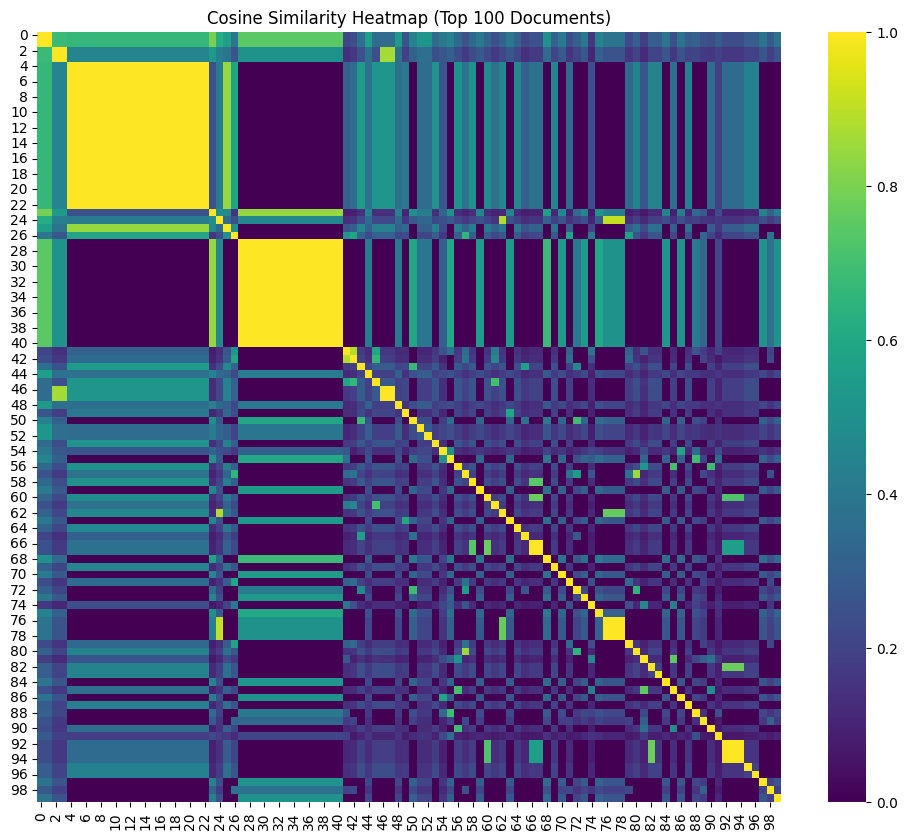

In [10]:
# 유사도 분석 및 상위 100개 문서의 코사인 유사도 히트맵 생성
# 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf)  # TF-IDF 행렬을 사용하여 코사인 유사도 계산

# 상위 100개 문서 선택
top_n = 100  # 상위 100개 문서 선택
top_indices = np.argsort(cosine_similarities.sum(axis=0))[::-1][:top_n]  # 유사도가 높은 문서 선택

# 상위 100개 문서의 유사도 행렬 생성
similarity_matrix_top100 = cosine_similarities[top_indices, :][:, top_indices]

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix_top100, cmap='viridis', annot=False)  # 히트맵 생성
plt.title('Cosine Similarity Heatmap (Top 100 Documents)')  # 그래프 제목 설정
plt.show()

### 분석 : 군집화


Cluster 0:
  Number of data points: 12
  - 추천합니다: 9.200
  - 맛있어요: 2.360
  - 좋아요: 0.879
  - 맛있는: 0.763
  - 받았습니다: 0.718
  - 순두부: 0.678
  - 저렴하고: 0.641
  - 먹습니다: 0.549
  - 괜찮아요: 0.543
  - 구매해서: 0.469
  - 맛나요: 0.443
  - 자주: 0.313
  - 제품입니다: 0.000
  - 매번: 0.000
  - 먹고: 0.000
  - 있어요: 0.000
  - 둘이: 0.000
  - 조금: 0.000
  - 얼큰하고: 0.000
  - 든든하게: 0.000

Cluster 1:
  Number of data points: 756
  - 맛있어요: 44.925
  - 자주: 20.142
  - 맛있게: 18.871
  - 항상: 15.725
  - 감사합니다: 13.345
  - 구매하는: 13.229
  - 너무: 12.946
  - 제품입니다: 12.652
  - 만족합니다: 11.562
  - 먹었어요: 10.686
  - 맛있어서: 10.102
  - 먹었습니다: 9.943
  - 조금: 8.761
  - 저렴하게: 8.723
  - 상품입니다: 8.680
  - 같아요: 8.598
  - 있어요: 8.463
  - 양이: 8.249
  - 맛있습니다: 8.189
  - 좋습니다: 7.981

Cluster 2:
  Number of data points: 2
  - 냉이: 1.171
  - 근데: 1.115
  - 상태가: 0.425
  - 괜찮아요: 0.389
  - 좋네요: 0.384
  - 맛은: 0.374
  - 제품입니다: 0.000
  - 매번: 0.000
  - 구매해서: 0.000
  - 먹고: 0.000
  - 있어요: 0.000
  - 둘이: 0.000
  - 조금: 0.000
  - 얼큰하고: 0.000
  - 든든하게: 0.000
  - 한끼: 0.000
  - 먹을수: 0

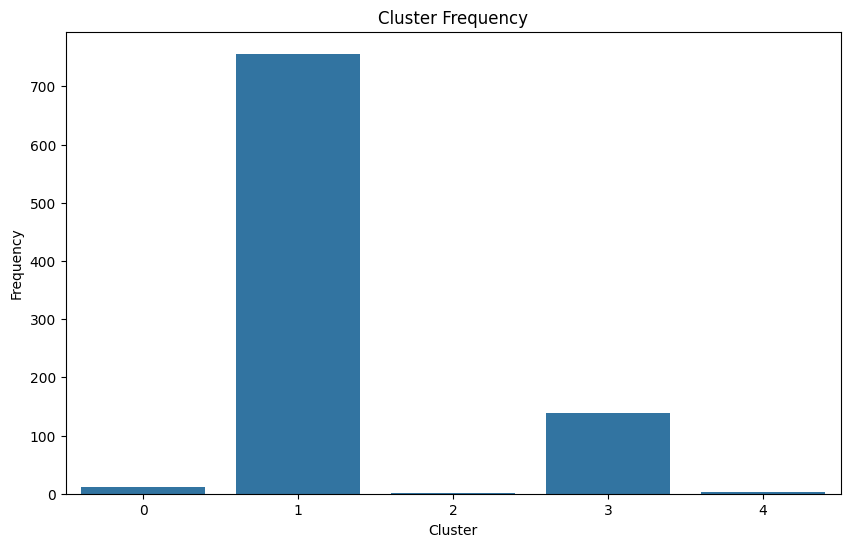

In [11]:
# K-Means를 사용한 군집화 수행
kmeans = KMeans(n_clusters=5, random_state=42)  # K-Means 모델 초기화 (5개의 군집 설정)
df['cluster'] = kmeans.fit_predict(tfidf)  # 각 리뷰를 5개의 군집으로 분류하고 결과를 새로운 열에 저장

# 각 군집별 데이터 수와 상위 키워드 출력
for cluster_num in range(5):  # 각 군집에 대해 반복
    print(f"\nCluster {cluster_num}:")  # 군집 번호 출력
    cluster_data = df[df['cluster'] == cluster_num]  # 해당 군집의 데이터 선택
    print(f"  Number of data points: {len(cluster_data)}")  # 군집에 포함된 데이터 개수 출력

    # 군집 내 문서의 TF-IDF 합 계산
    cluster_tfidf = tfidf[df['cluster'] == cluster_num]
    cluster_tfidf_sums = cluster_tfidf.sum(axis=0)

    # 상위 20개 키워드 추출
    word_scores = [(word, cluster_tfidf_sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)
    top_keywords = sorted_word_scores[:20]

    # 키워드와 가중치 출력
    for word, score in top_keywords:
        print(f"  - {word}: {score:.3f}")

# 각 군집별 빈도수 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)  # 군집별 데이터 개수를 막대 그래프로 시각화
plt.title('Cluster Frequency')  # 그래프 제목 설정
plt.xlabel('Cluster')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()

### 분석 : 감정 분석

In [12]:
# prompt: 'df[product_id]' 별 'df[content]' 에 대한 감정 분석

from konlpy.tag import Okt
from collections import Counter

def analyze_sentiment(text):
    okt = Okt()
    nouns = okt.nouns(text)
    # 감정 사전 로드 또는 감정 분석 API 사용 (구현 필요)
    # 여기서는 단순 예시로 긍정/부정 단어 수를 세어 판단합니다.
    positive_words = ["맛있다", "좋다", "최고", "훌륭하다"]
    negative_words = ["싫다", "나쁘다", "별로", "최악"]
    positive_count = sum(1 for word in nouns if word in positive_words)
    negative_count = sum(1 for word in nouns if word in negative_words)
    if positive_count > negative_count:
        return "긍정"
    elif negative_count > positive_count:
        return "부정"
    else:
        return "중립"

# 제품 ID별 감정 분석 결과 추가
df['sentiment'] = df['content'].apply(analyze_sentiment)

# 제품 ID별 감정 분석 결과 출력
for product_id in df['product_id'].unique():
    product_reviews = df[df['product_id'] == product_id]
    positive_count = len(product_reviews[product_reviews['sentiment'] == '긍정'])
    negative_count = len(product_reviews[product_reviews['sentiment'] == '부정'])
    neutral_count = len(product_reviews[product_reviews['sentiment'] == '중립'])
    print(f"Product ID: {product_id}")
    print(f"  Positive: {positive_count}")
    print(f"  Negative: {negative_count}")
    print(f"  Neutral: {neutral_count}")

Product ID: 1000049359710
  Positive: 1
  Negative: 0
  Neutral: 49
Product ID: 1000052494018
  Positive: 3
  Negative: 1
  Neutral: 46
Product ID: 1000060790087
  Positive: 1
  Negative: 2
  Neutral: 47
Product ID: 1000552428426
  Positive: 0
  Negative: 0
  Neutral: 50
Product ID: 1000575098562
  Positive: 2
  Negative: 0
  Neutral: 48
Product ID: 1000577671536
  Positive: 2
  Negative: 0
  Neutral: 48
Product ID: 1000579627633
  Positive: 0
  Negative: 1
  Neutral: 49
Product ID: 1000580702094
  Positive: 0
  Negative: 1
  Neutral: 49
Product ID: 1000581051191
  Positive: 0
  Negative: 1
  Neutral: 49
Product ID: 1000581571518
  Positive: 0
  Negative: 0
  Neutral: 50
Product ID: 1000594184482
  Positive: 1
  Negative: 1
  Neutral: 48
Product ID: 1000595812799
  Positive: 0
  Negative: 0
  Neutral: 50
Product ID: 1000599436903
  Positive: 0
  Negative: 1
  Neutral: 49
Product ID: 1000600712078
  Positive: 0
  Negative: 2
  Neutral: 48
Product ID: 1000604385769
  Positive: 1
  Negati

### 분석 : 워드클라우드 생성

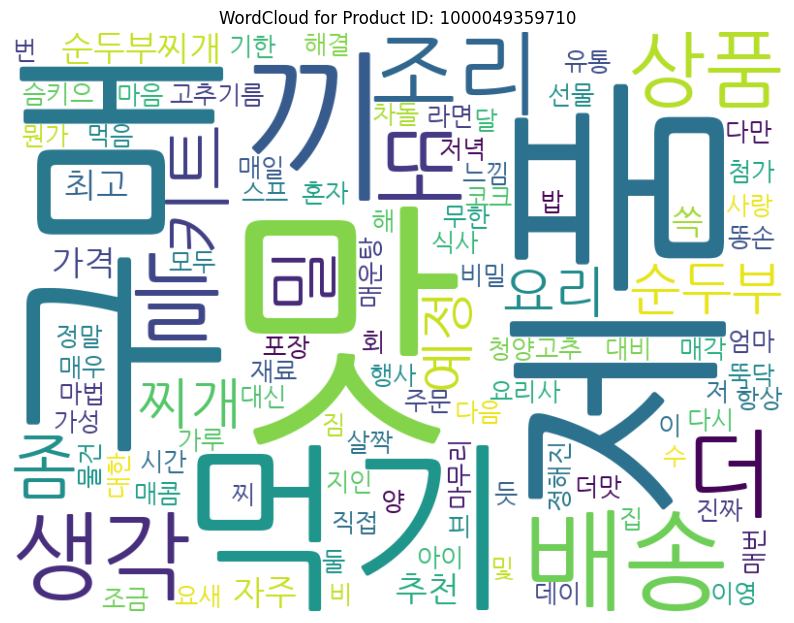

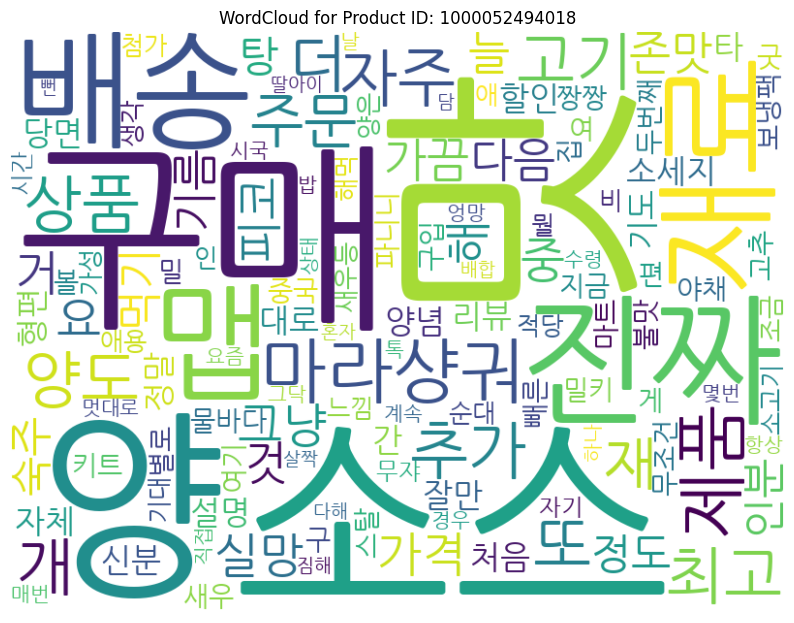

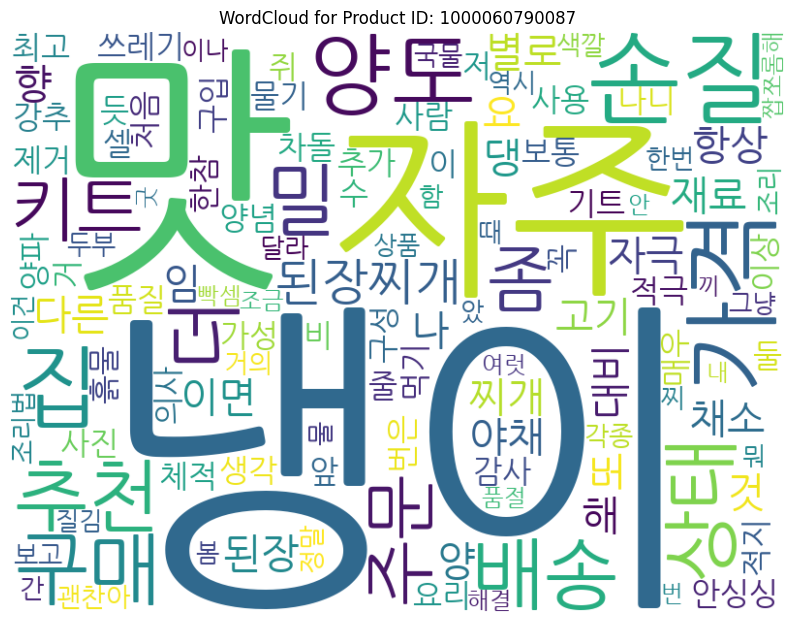

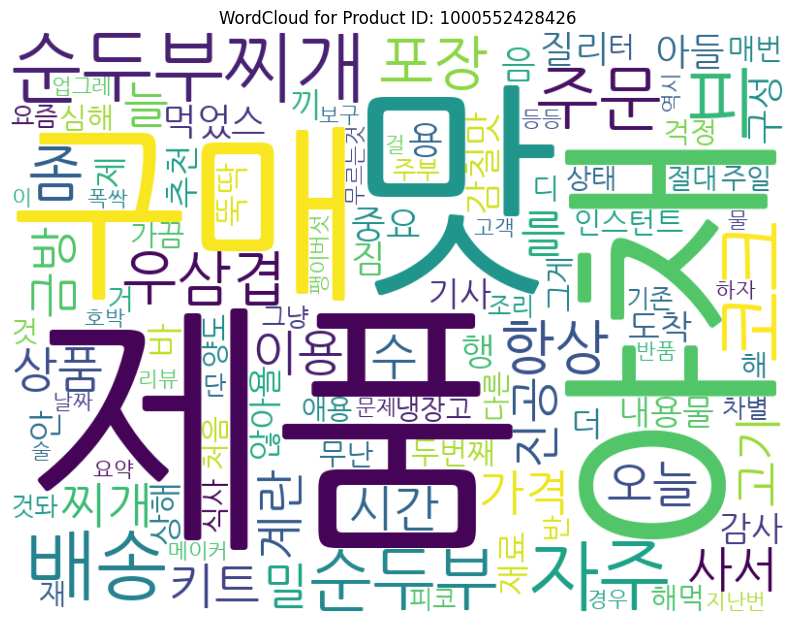

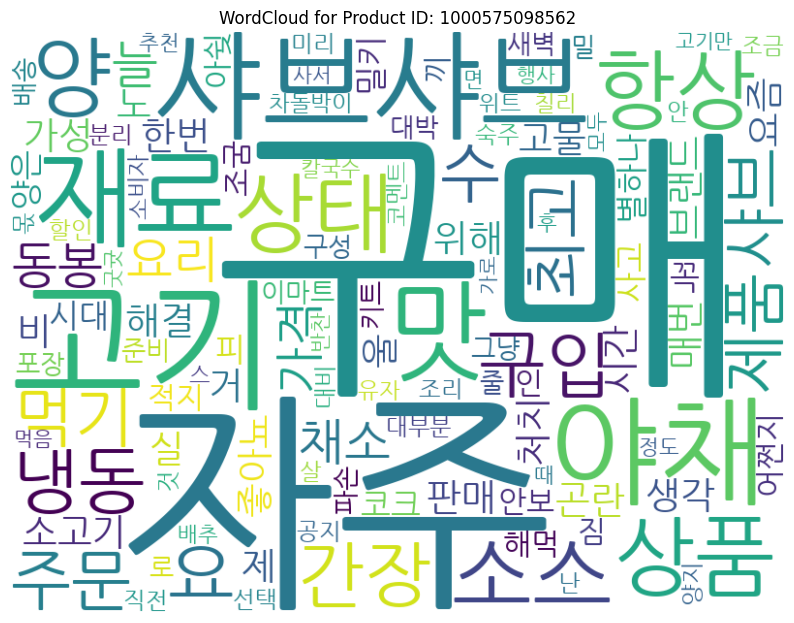

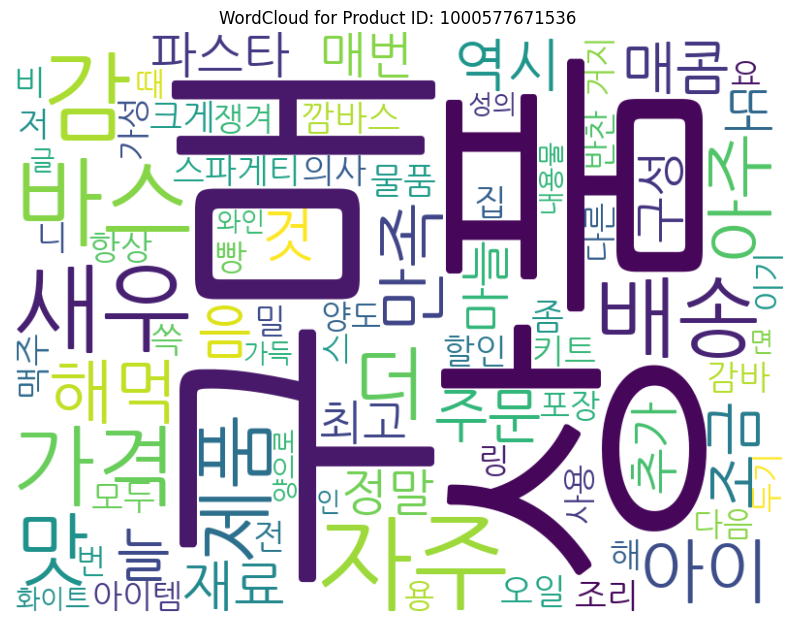

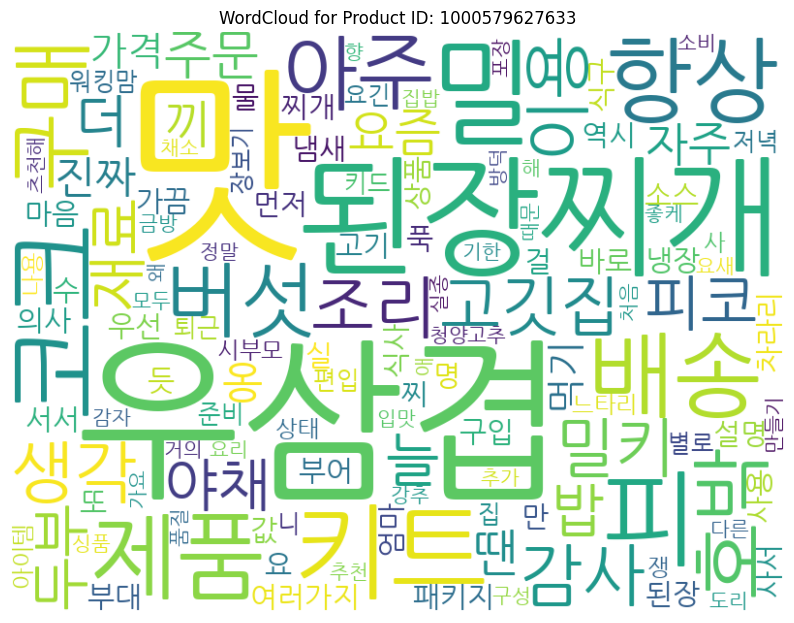

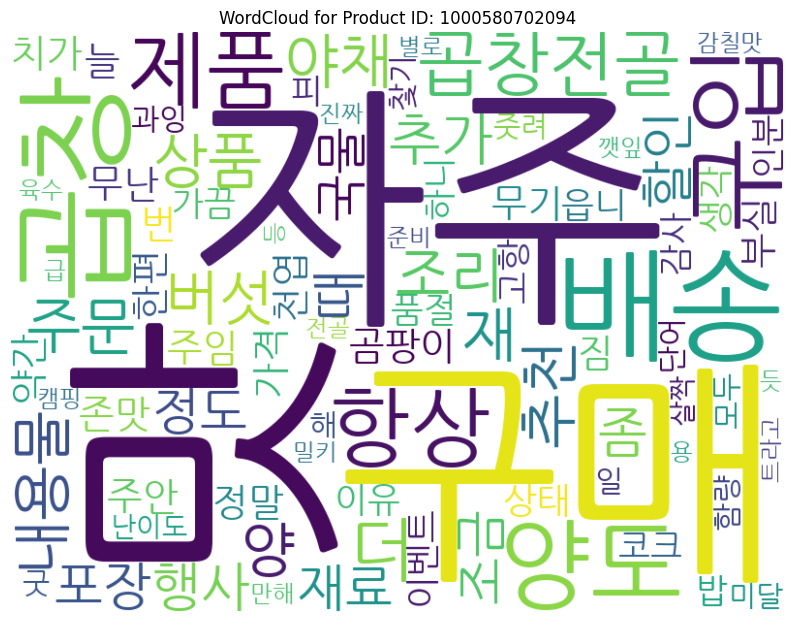

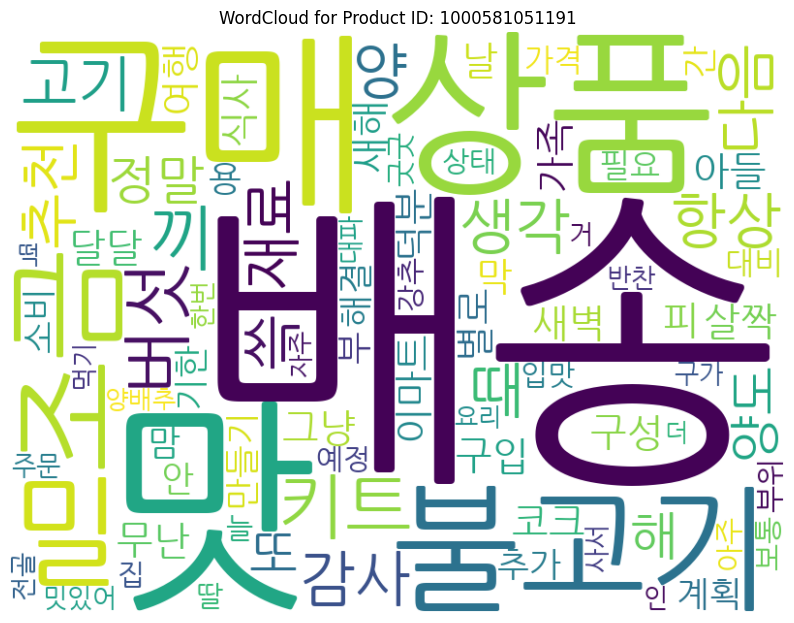

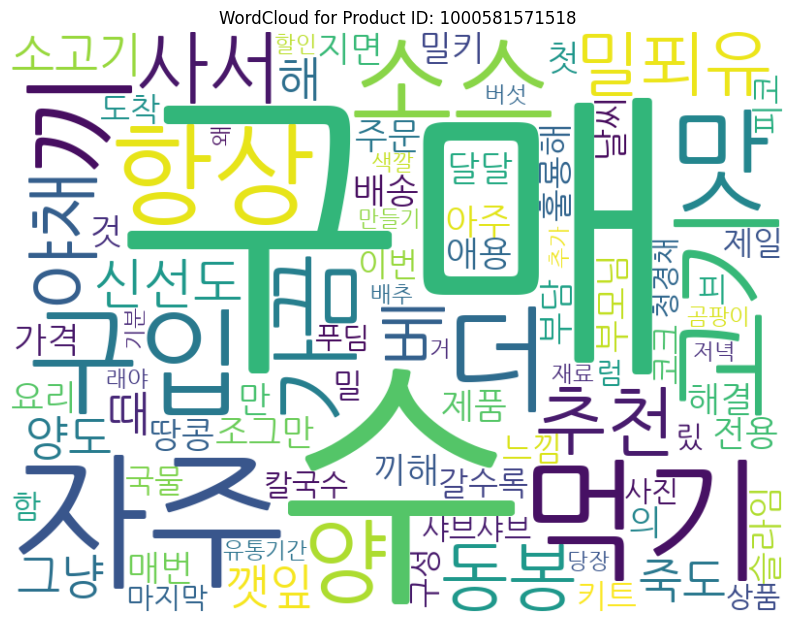

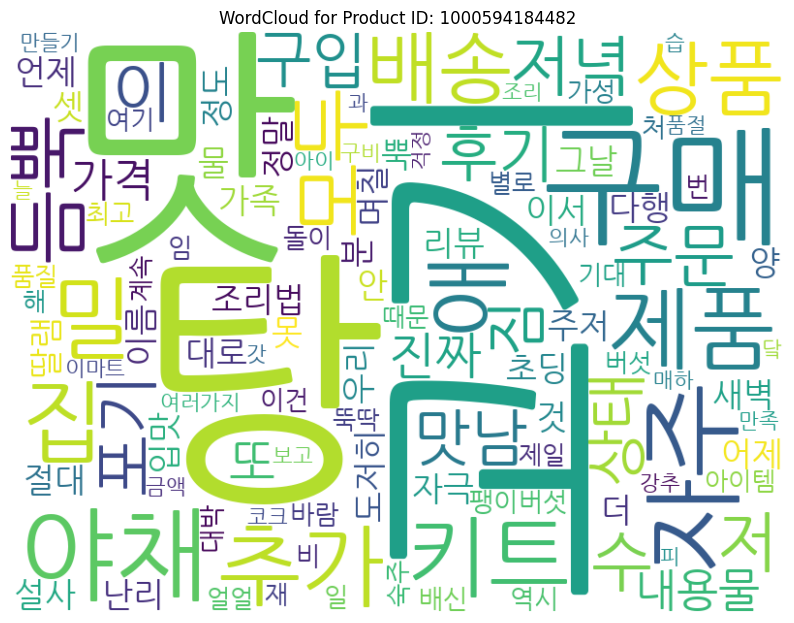

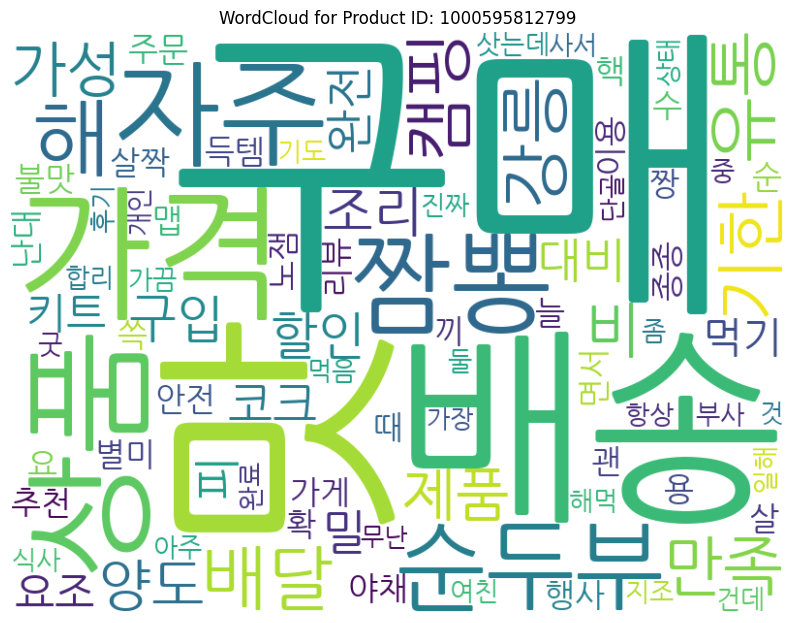

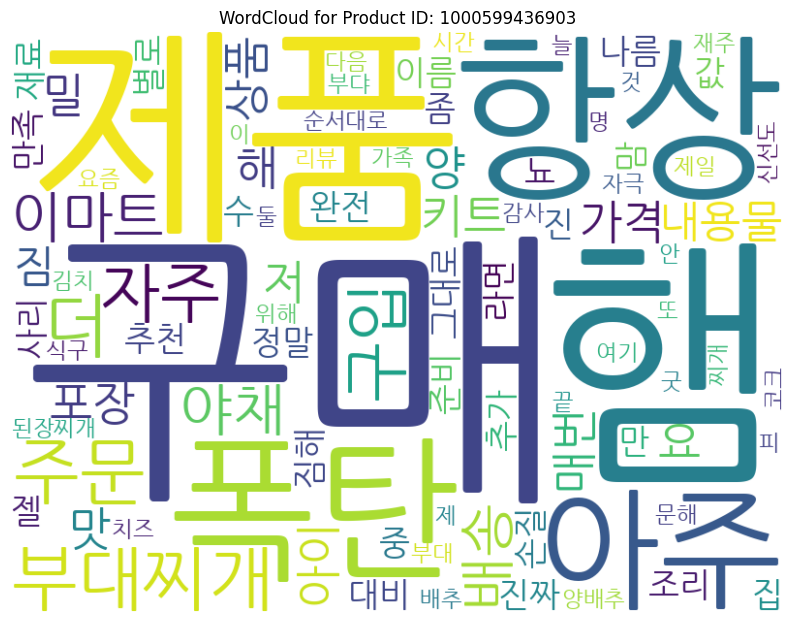

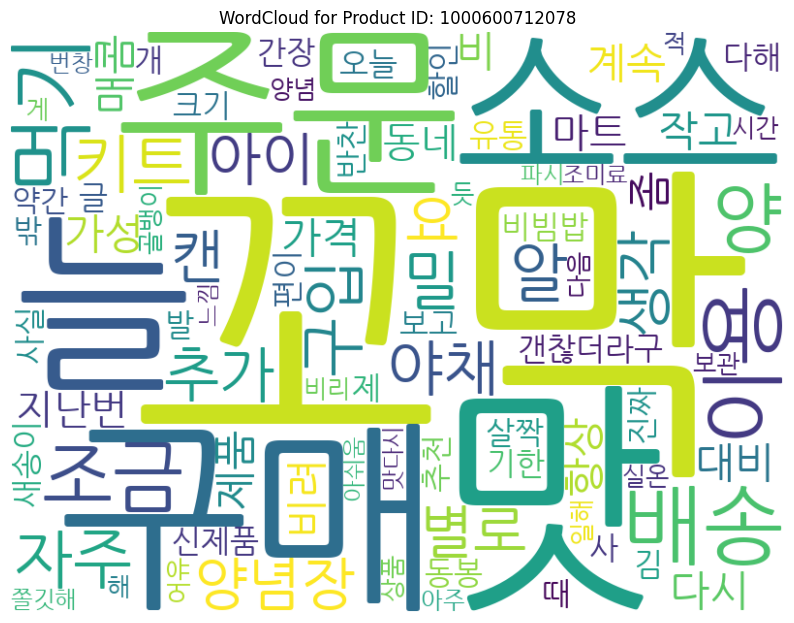

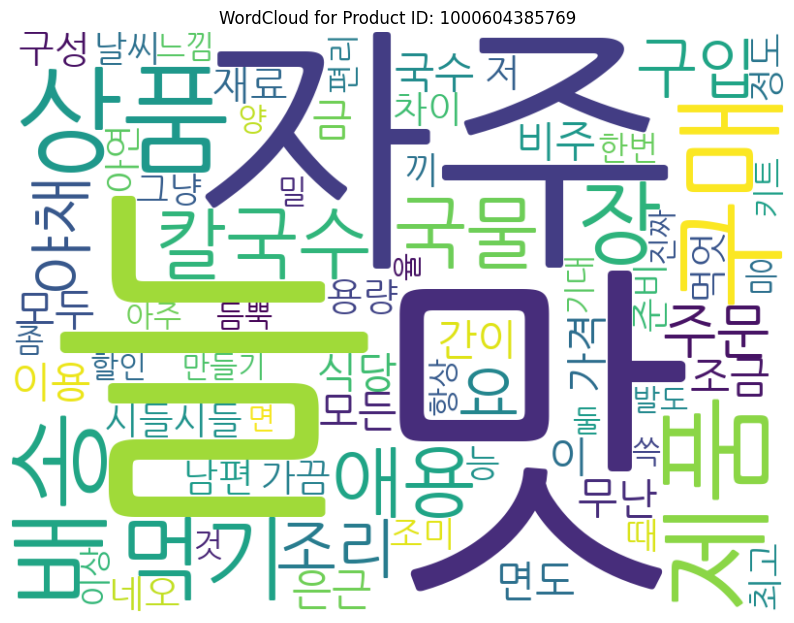

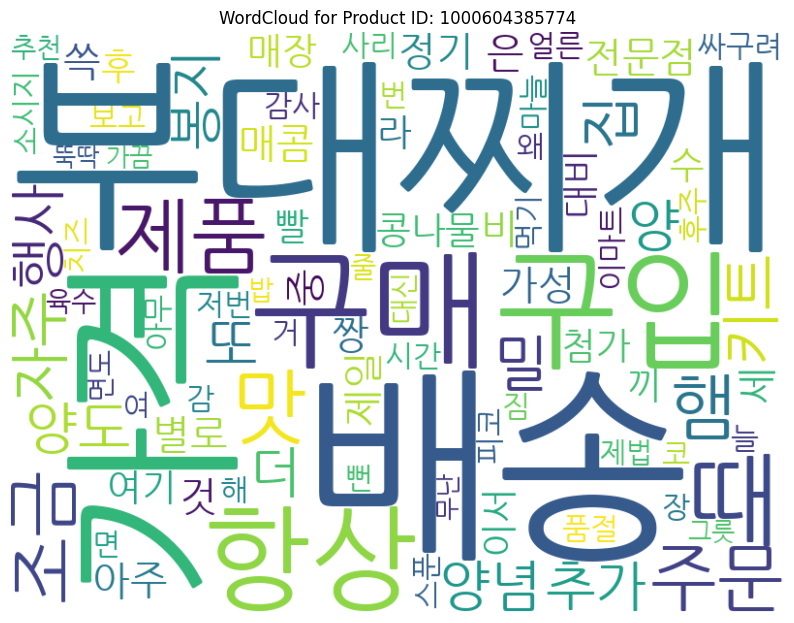

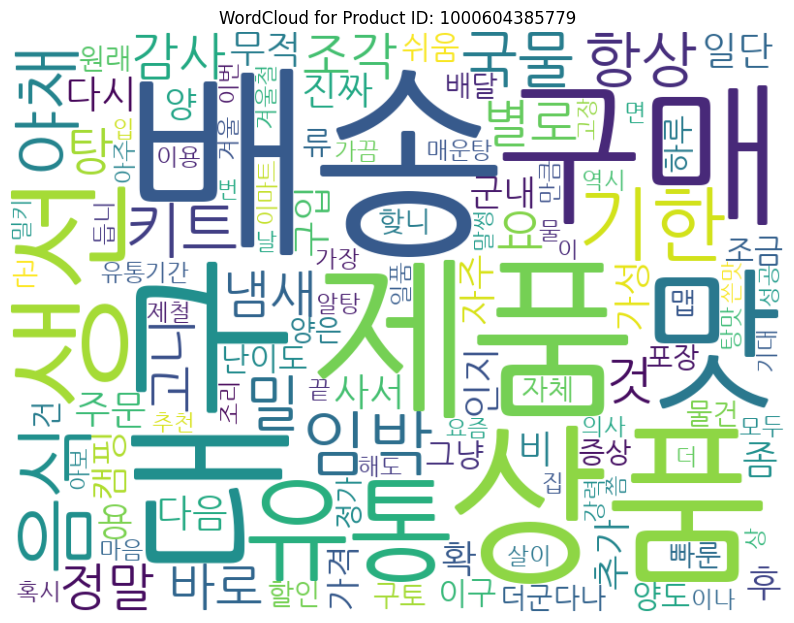

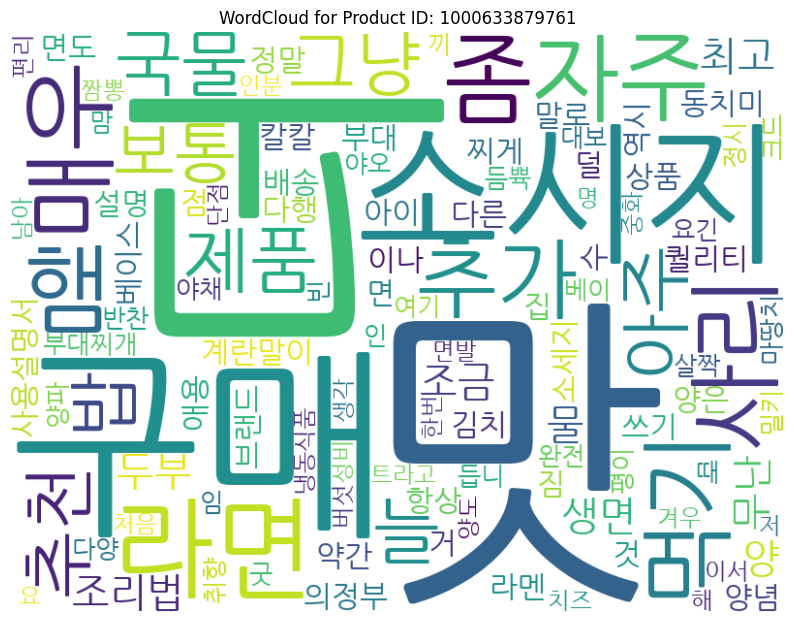

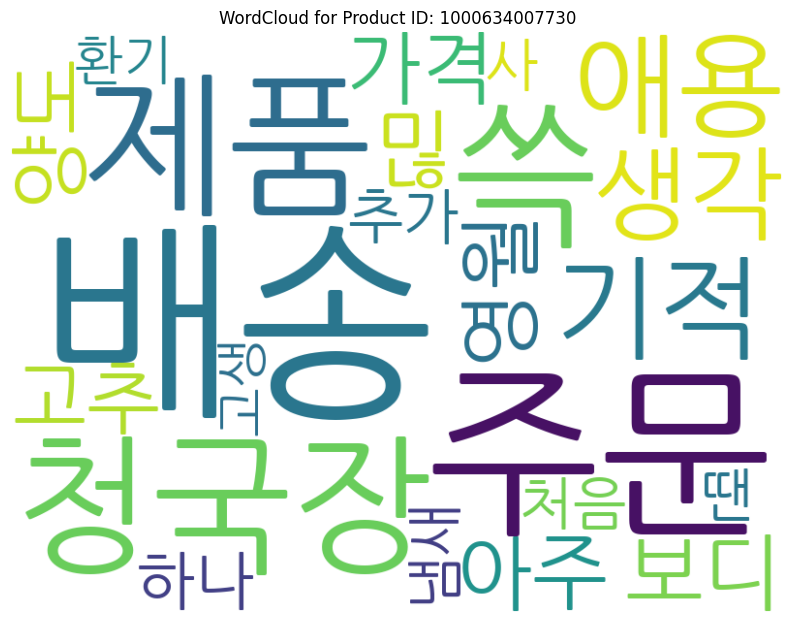

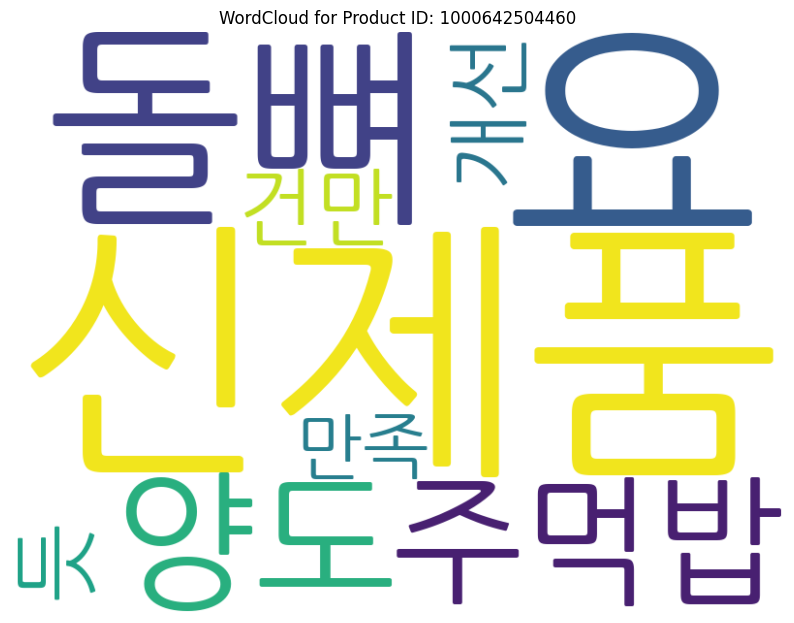

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for product_id in df['product_id'].unique():
    product_reviews = df[df['content'].notnull() & (df['product_id'] == product_id)]
    text = ' '.join(product_reviews['content'])
    okt = Okt()
    nouns = okt.nouns(text)
    count = Counter(nouns)

    # 한글 폰트 설정 (필요에 따라 경로 수정)
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 또는 다른 한글 폰트 경로

    wordcloud = WordCloud(font_path=font_path, width=800, height=600, background_color='white').generate_from_frequencies(count)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Product ID: {product_id}')
    plt.show()

### 분석 : 감정 분석

#### 라이브러리 설치

In [7]:
!pip install kobert-transformers
!pip install torch
!pip install transformers
!pip install sentencepiece

### 분석 : 감정분석 - skt/kobert-base-v1

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from tqdm import tqdm

# KoBERT 모델과 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")
model = AutoModelForSequenceClassification.from_pretrained("skt/kobert-base-v1", num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def analyze_sentiment(text):
    # 입력 텍스트 전처리 및 토큰화
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=512,
        padding=True
    ).to(device)

    # 감정 분석 수행
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        positive_score = predictions[0][1].item()

    return positive_score

# 데이터프레임의 각 리뷰에 대해 감정 분석 수행
df['sentiment_score'] = 0.0
for idx in tqdm(range(len(df))):
    try:
        sentiment = analyze_sentiment(df['content'].iloc[idx])
        df.loc[idx, 'sentiment_score'] = sentiment
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        continue

# 상품ID별 평균 감정 점수 계산
product_sentiment = df.groupby('product_id')['sentiment_score'].agg([
    'mean',
    'count',
    'std'
]).reset_index()

# 결과 정렬 (평균 감정 점수 기준 내림차순)
product_sentiment = product_sentiment.sort_values('mean', ascending=False)

print("상품별 감정 분석 결과:")
print(product_sentiment)

tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  1%|          | 9/911 [00:00<00:19, 46.49it/s]

Error processing row 0: index out of range in self
Error processing row 1: index out of range in self
Error processing row 2: index out of range in self
Error processing row 3: index out of range in self
Error processing row 4: index out of range in self
Error processing row 5: index out of range in self
Error processing row 6: index out of range in self
Error processing row 7: index out of range in self
Error processing row 8: index out of range in self
Error processing row 9: index out of range in self


  2%|▏         | 14/911 [00:00<00:34, 25.83it/s]

Error processing row 10: index out of range in self
Error processing row 11: index out of range in self
Error processing row 12: index out of range in self
Error processing row 13: index out of range in self


  2%|▏         | 20/911 [00:00<00:32, 27.13it/s]

Error processing row 14: index out of range in self
Error processing row 15: index out of range in self
Error processing row 16: index out of range in self
Error processing row 17: index out of range in self
Error processing row 18: index out of range in self
Error processing row 19: index out of range in self
Error processing row 20: index out of range in self


  3%|▎         | 28/911 [00:00<00:31, 28.18it/s]

Error processing row 21: index out of range in self
Error processing row 22: index out of range in self
Error processing row 23: index out of range in self
Error processing row 24: index out of range in self
Error processing row 25: index out of range in self
Error processing row 26: index out of range in self
Error processing row 27: index out of range in self


  4%|▍         | 39/911 [00:01<00:21, 40.37it/s]

Error processing row 28: index out of range in self
Error processing row 29: index out of range in self
Error processing row 30: index out of range in self
Error processing row 31: index out of range in self
Error processing row 32: index out of range in self
Error processing row 33: index out of range in self
Error processing row 34: index out of range in self
Error processing row 35: index out of range in self
Error processing row 36: index out of range in self
Error processing row 37: index out of range in self
Error processing row 38: index out of range in self
Error processing row 39: index out of range in self
Error processing row 40: index out of range in self
Error processing row 41: index out of range in self
Error processing row 42: index out of range in self
Error processing row 43: index out of range in self
Error processing row 44: index out of range in self
Error processing row 45: index out of range in self
Error processing row 46: index out of range in self
Error proces

  7%|▋         | 61/911 [00:01<00:17, 49.45it/s]

Error processing row 55: index out of range in self
Error processing row 56: index out of range in self
Error processing row 57: index out of range in self
Error processing row 58: index out of range in self
Error processing row 59: index out of range in self
Error processing row 60: index out of range in self
Error processing row 61: index out of range in self
Error processing row 62: index out of range in self
Error processing row 63: index out of range in self
Error processing row 64: index out of range in self
Error processing row 65: index out of range in self
Error processing row 66: index out of range in self


  9%|▊         | 78/911 [00:01<00:12, 64.94it/s]

Error processing row 67: index out of range in self
Error processing row 68: index out of range in self
Error processing row 69: index out of range in self
Error processing row 70: index out of range in self
Error processing row 71: index out of range in self
Error processing row 72: index out of range in self
Error processing row 73: index out of range in self
Error processing row 74: index out of range in self
Error processing row 75: index out of range in self
Error processing row 76: index out of range in self
Error processing row 77: index out of range in self
Error processing row 78: index out of range in self
Error processing row 79: index out of range in self
Error processing row 80: index out of range in self
Error processing row 81: index out of range in self
Error processing row 82: index out of range in self


 10%|▉         | 91/911 [00:02<00:15, 54.52it/s]

Error processing row 83: index out of range in self
Error processing row 84: index out of range in self
Error processing row 85: index out of range in self
Error processing row 86: index out of range in self
Error processing row 87: index out of range in self
Error processing row 88: index out of range in self
Error processing row 89: index out of range in self
Error processing row 90: index out of range in self
Error processing row 91: index out of range in self
Error processing row 92: index out of range in self
Error processing row 93: index out of range in self


 14%|█▎        | 124/911 [00:02<00:07, 110.63it/s]

Error processing row 94: index out of range in self
Error processing row 95: index out of range in self
Error processing row 96: index out of range in self
Error processing row 97: index out of range in self
Error processing row 98: index out of range in self
Error processing row 99: index out of range in self
Error processing row 100: index out of range in self
Error processing row 101: index out of range in self
Error processing row 102: index out of range in self
Error processing row 103: index out of range in self
Error processing row 104: index out of range in self
Error processing row 105: index out of range in self
Error processing row 106: index out of range in self
Error processing row 107: index out of range in self
Error processing row 108: index out of range in self
Error processing row 109: index out of range in self
Error processing row 110: index out of range in self
Error processing row 111: index out of range in self
Error processing row 112: index out of range in self

 16%|█▌        | 147/911 [00:02<00:14, 54.31it/s]

Error processing row 135: index out of range in self
Error processing row 136: index out of range in self
Error processing row 137: index out of range in self
Error processing row 138: index out of range in self
Error processing row 139: index out of range in self
Error processing row 140: index out of range in self
Error processing row 141: index out of range in self
Error processing row 142: index out of range in self
Error processing row 143: index out of range in self
Error processing row 144: index out of range in self
Error processing row 145: index out of range in self
Error processing row 146: index out of range in self


 17%|█▋        | 156/911 [00:03<00:12, 59.71it/s]

Error processing row 147: index out of range in self
Error processing row 148: index out of range in self
Error processing row 149: index out of range in self
Error processing row 150: index out of range in self
Error processing row 151: index out of range in self
Error processing row 152: index out of range in self
Error processing row 153: index out of range in self
Error processing row 154: index out of range in self
Error processing row 155: index out of range in self
Error processing row 156: index out of range in self
Error processing row 157: index out of range in self
Error processing row 158: index out of range in self
Error processing row 159: index out of range in self
Error processing row 160: index out of range in self
Error processing row 161: index out of range in self
Error processing row 162: index out of range in self


 19%|█▉        | 173/911 [00:03<00:14, 50.91it/s]

Error processing row 163: index out of range in self
Error processing row 164: index out of range in self
Error processing row 165: index out of range in self
Error processing row 166: index out of range in self
Error processing row 167: index out of range in self
Error processing row 168: index out of range in self
Error processing row 169: index out of range in self
Error processing row 170: index out of range in self
Error processing row 171: index out of range in self
Error processing row 172: index out of range in self
Error processing row 173: index out of range in self


 20%|█▉        | 180/911 [00:03<00:13, 53.74it/s]

Error processing row 174: index out of range in self
Error processing row 175: index out of range in self
Error processing row 176: index out of range in self
Error processing row 177: index out of range in self
Error processing row 178: index out of range in self
Error processing row 179: index out of range in self
Error processing row 180: index out of range in self
Error processing row 181: index out of range in self
Error processing row 182: index out of range in self
Error processing row 183: index out of range in self


 21%|██        | 193/911 [00:03<00:14, 49.89it/s]

Error processing row 184: index out of range in self
Error processing row 185: index out of range in self
Error processing row 186: index out of range in self
Error processing row 187: index out of range in self
Error processing row 188: index out of range in self
Error processing row 189: index out of range in self
Error processing row 190: index out of range in self
Error processing row 191: index out of range in self
Error processing row 192: index out of range in self


 23%|██▎       | 208/911 [00:04<00:14, 49.92it/s]

Error processing row 193: index out of range in self
Error processing row 194: index out of range in self
Error processing row 195: index out of range in self
Error processing row 196: index out of range in self
Error processing row 197: index out of range in self
Error processing row 198: index out of range in self
Error processing row 199: index out of range in self
Error processing row 200: index out of range in self
Error processing row 201: index out of range in self
Error processing row 202: index out of range in self
Error processing row 203: index out of range in self
Error processing row 204: index out of range in self
Error processing row 205: index out of range in self
Error processing row 206: index out of range in self
Error processing row 207: index out of range in self
Error processing row 208: index out of range in self


 26%|██▌       | 235/911 [00:04<00:07, 88.92it/s]

Error processing row 209: index out of range in self
Error processing row 210: index out of range in self
Error processing row 211: index out of range in self
Error processing row 212: index out of range in self
Error processing row 213: index out of range in self
Error processing row 214: index out of range in self
Error processing row 215: index out of range in self
Error processing row 216: index out of range in self
Error processing row 217: index out of range in self
Error processing row 218: index out of range in self
Error processing row 219: index out of range in self
Error processing row 220: index out of range in self
Error processing row 221: index out of range in self
Error processing row 222: index out of range in self
Error processing row 223: index out of range in self
Error processing row 224: index out of range in self
Error processing row 225: index out of range in self
Error processing row 226: index out of range in self
Error processing row 227: index out of range i

 27%|██▋       | 246/911 [00:04<00:08, 74.98it/s]

Error processing row 235: index out of range in self
Error processing row 236: index out of range in self
Error processing row 237: index out of range in self
Error processing row 238: index out of range in self
Error processing row 239: index out of range in self
Error processing row 240: index out of range in self
Error processing row 241: index out of range in self
Error processing row 242: index out of range in self
Error processing row 243: index out of range in self
Error processing row 244: index out of range in self
Error processing row 245: index out of range in self
Error processing row 246: index out of range in self


 28%|██▊       | 255/911 [00:04<00:10, 63.92it/s]

Error processing row 247: index out of range in self
Error processing row 248: index out of range in self
Error processing row 249: index out of range in self
Error processing row 250: index out of range in self
Error processing row 251: index out of range in self
Error processing row 252: index out of range in self
Error processing row 253: index out of range in self
Error processing row 254: index out of range in self


 29%|██▉       | 263/911 [00:04<00:11, 55.90it/s]

Error processing row 255: index out of range in self
Error processing row 256: index out of range in self
Error processing row 257: index out of range in self
Error processing row 258: index out of range in self
Error processing row 259: index out of range in self
Error processing row 260: index out of range in self
Error processing row 261: index out of range in self
Error processing row 262: index out of range in self
Error processing row 263: index out of range in self
Error processing row 264: index out of range in self
Error processing row 265: index out of range in self
Error processing row 266: index out of range in self
Error processing row 267: index out of range in self


 30%|███       | 276/911 [00:05<00:12, 51.19it/s]

Error processing row 268: index out of range in self
Error processing row 269: index out of range in self
Error processing row 270: index out of range in self
Error processing row 271: index out of range in self
Error processing row 272: index out of range in self
Error processing row 273: index out of range in self
Error processing row 274: index out of range in self
Error processing row 275: index out of range in self
Error processing row 276: index out of range in self


 32%|███▏      | 288/911 [00:05<00:13, 44.55it/s]

Error processing row 277: index out of range in self
Error processing row 278: index out of range in self
Error processing row 279: index out of range in self
Error processing row 280: index out of range in self
Error processing row 281: index out of range in self
Error processing row 282: index out of range in self
Error processing row 283: index out of range in self
Error processing row 284: index out of range in self
Error processing row 285: index out of range in self
Error processing row 286: index out of range in self
Error processing row 287: index out of range in self


 33%|███▎      | 299/911 [00:05<00:12, 48.94it/s]

Error processing row 288: index out of range in self
Error processing row 289: index out of range in self
Error processing row 290: index out of range in self
Error processing row 291: index out of range in self
Error processing row 292: index out of range in self
Error processing row 293: index out of range in self
Error processing row 294: index out of range in self
Error processing row 295: index out of range in self
Error processing row 296: index out of range in self
Error processing row 297: index out of range in self
Error processing row 298: index out of range in self


 35%|███▌      | 319/911 [00:05<00:08, 69.71it/s]

Error processing row 299: index out of range in self
Error processing row 300: index out of range in self
Error processing row 301: index out of range in self
Error processing row 302: index out of range in self
Error processing row 303: index out of range in self
Error processing row 304: index out of range in self
Error processing row 305: index out of range in self
Error processing row 306: index out of range in self
Error processing row 307: index out of range in self
Error processing row 308: index out of range in self
Error processing row 309: index out of range in self
Error processing row 310: index out of range in self
Error processing row 311: index out of range in self
Error processing row 312: index out of range in self
Error processing row 313: index out of range in self
Error processing row 314: index out of range in self
Error processing row 315: index out of range in self
Error processing row 316: index out of range in self
Error processing row 317: index out of range i

 36%|███▌      | 327/911 [00:06<00:10, 57.47it/s]

Error processing row 319: index out of range in self
Error processing row 320: index out of range in self
Error processing row 321: index out of range in self
Error processing row 322: index out of range in self
Error processing row 323: index out of range in self
Error processing row 324: index out of range in self
Error processing row 325: index out of range in self
Error processing row 326: index out of range in self
Error processing row 327: index out of range in self
Error processing row 328: index out of range in self
Error processing row 329: index out of range in self
Error processing row 330: index out of range in self
Error processing row 331: index out of range in self
Error processing row 332: index out of range in self
Error processing row 333: index out of range in self
Error processing row 334: index out of range in self
Error processing row 335: index out of range in self
Error processing row 336: index out of range in self
Error processing row 337: index out of range i

 38%|███▊      | 348/911 [00:06<00:07, 75.66it/s]

Error processing row 338: index out of range in self
Error processing row 339: index out of range in self
Error processing row 340: index out of range in self
Error processing row 341: index out of range in self
Error processing row 342: index out of range in self
Error processing row 343: index out of range in self
Error processing row 344: index out of range in self
Error processing row 345: index out of range in self
Error processing row 346: index out of range in self
Error processing row 347: index out of range in self
Error processing row 348: index out of range in self
Error processing row 349: index out of range in self
Error processing row 350: index out of range in self
Error processing row 351: index out of range in self


 40%|████      | 365/911 [00:06<00:08, 66.79it/s]

Error processing row 352: index out of range in self
Error processing row 353: index out of range in self
Error processing row 354: index out of range in self
Error processing row 355: index out of range in self
Error processing row 356: index out of range in self
Error processing row 357: index out of range in self
Error processing row 358: index out of range in self
Error processing row 359: index out of range in self
Error processing row 360: index out of range in self
Error processing row 361: index out of range in self
Error processing row 362: index out of range in self
Error processing row 363: index out of range in self
Error processing row 364: index out of range in self
Error processing row 365: index out of range in self
Error processing row 366: index out of range in self
Error processing row 367: index out of range in self
Error processing row 368: index out of range in self
Error processing row 369: index out of range in self
Error processing row 370: index out of range i

 41%|████      | 375/911 [00:06<00:07, 74.96it/s]

Error processing row 371: index out of range in self
Error processing row 372: index out of range in self
Error processing row 373: index out of range in self
Error processing row 374: index out of range in self
Error processing row 375: index out of range in self
Error processing row 376: index out of range in self
Error processing row 377: index out of range in self
Error processing row 378: index out of range in self
Error processing row 379: index out of range in self
Error processing row 380: index out of range in self
Error processing row 381: index out of range in self
Error processing row 382: index out of range in self
Error processing row 383: index out of range in self


 44%|████▍     | 399/911 [00:07<00:08, 57.94it/s]

Error processing row 384: index out of range in self
Error processing row 385: index out of range in self
Error processing row 386: index out of range in self
Error processing row 387: index out of range in self
Error processing row 388: index out of range in self
Error processing row 389: index out of range in self
Error processing row 390: index out of range in self
Error processing row 391: index out of range in self
Error processing row 392: index out of range in self
Error processing row 393: index out of range in self
Error processing row 394: index out of range in self
Error processing row 395: index out of range in self
Error processing row 396: index out of range in self
Error processing row 397: index out of range in self
Error processing row 398: index out of range in self


 45%|████▍     | 406/911 [00:07<00:08, 60.42it/s]

Error processing row 399: index out of range in self
Error processing row 400: index out of range in self
Error processing row 401: index out of range in self
Error processing row 402: index out of range in self
Error processing row 403: index out of range in self
Error processing row 404: index out of range in self
Error processing row 405: index out of range in self
Error processing row 406: index out of range in self
Error processing row 407: index out of range in self
Error processing row 408: index out of range in self
Error processing row 409: index out of range in self
Error processing row 410: index out of range in self


 46%|████▌     | 420/911 [00:07<00:08, 54.81it/s]

Error processing row 411: index out of range in self
Error processing row 412: index out of range in self
Error processing row 413: index out of range in self
Error processing row 414: index out of range in self
Error processing row 415: index out of range in self
Error processing row 416: index out of range in self
Error processing row 417: index out of range in self
Error processing row 418: index out of range in self
Error processing row 419: index out of range in self
Error processing row 420: index out of range in self
Error processing row 421: index out of range in self
Error processing row 422: index out of range in self
Error processing row 423: index out of range in self


 49%|████▊     | 442/911 [00:07<00:05, 81.49it/s]

Error processing row 424: index out of range in self
Error processing row 425: index out of range in self
Error processing row 426: index out of range in self
Error processing row 427: index out of range in self
Error processing row 428: index out of range in self
Error processing row 429: index out of range in self
Error processing row 430: index out of range in self
Error processing row 431: index out of range in self
Error processing row 432: index out of range in self
Error processing row 433: index out of range in self
Error processing row 434: index out of range in self
Error processing row 435: index out of range in self
Error processing row 436: index out of range in self
Error processing row 437: index out of range in self
Error processing row 438: index out of range in self
Error processing row 439: index out of range in self
Error processing row 440: index out of range in self
Error processing row 441: index out of range in self
Error processing row 442: index out of range i

 51%|█████     | 463/911 [00:08<00:04, 93.02it/s]

Error processing row 446: index out of range in self
Error processing row 447: index out of range in self
Error processing row 448: index out of range in self
Error processing row 449: index out of range in self
Error processing row 450: index out of range in self
Error processing row 451: index out of range in self
Error processing row 452: index out of range in self
Error processing row 453: index out of range in self
Error processing row 454: index out of range in self
Error processing row 455: index out of range in self
Error processing row 456: index out of range in self
Error processing row 457: index out of range in self
Error processing row 458: index out of range in self
Error processing row 459: index out of range in self
Error processing row 460: index out of range in self
Error processing row 461: index out of range in self
Error processing row 462: index out of range in self
Error processing row 463: index out of range in self
Error processing row 464: index out of range i

 52%|█████▏    | 473/911 [00:08<00:07, 61.23it/s]

Error processing row 465: index out of range in self
Error processing row 466: index out of range in self
Error processing row 467: index out of range in self
Error processing row 468: index out of range in self
Error processing row 469: index out of range in self
Error processing row 470: index out of range in self
Error processing row 471: index out of range in self
Error processing row 472: index out of range in self
Error processing row 473: index out of range in self


 54%|█████▎    | 488/911 [00:08<00:07, 57.23it/s]

Error processing row 474: index out of range in self
Error processing row 475: index out of range in self
Error processing row 476: index out of range in self
Error processing row 477: index out of range in self
Error processing row 478: index out of range in self
Error processing row 479: index out of range in self
Error processing row 480: index out of range in self
Error processing row 481: index out of range in self
Error processing row 482: index out of range in self
Error processing row 483: index out of range in self
Error processing row 484: index out of range in self
Error processing row 485: index out of range in self
Error processing row 486: index out of range in self
Error processing row 487: index out of range in self


 54%|█████▍    | 495/911 [00:08<00:06, 59.81it/s]

Error processing row 488: index out of range in self
Error processing row 489: index out of range in self
Error processing row 490: index out of range in self
Error processing row 491: index out of range in self
Error processing row 492: index out of range in self
Error processing row 493: index out of range in self
Error processing row 494: index out of range in self
Error processing row 495: index out of range in self
Error processing row 496: index out of range in self
Error processing row 497: index out of range in self
Error processing row 498: index out of range in self
Error processing row 499: index out of range in self
Error processing row 500: index out of range in self


 56%|█████▌    | 509/911 [00:09<00:07, 51.72it/s]

Error processing row 501: index out of range in self
Error processing row 502: index out of range in self
Error processing row 503: index out of range in self
Error processing row 504: index out of range in self
Error processing row 505: index out of range in self
Error processing row 506: index out of range in self
Error processing row 507: index out of range in self
Error processing row 508: index out of range in self
Error processing row 509: index out of range in self
Error processing row 510: index out of range in self
Error processing row 511: index out of range in self
Error processing row 512: index out of range in self
Error processing row 513: index out of range in self


 57%|█████▋    | 522/911 [00:09<00:06, 57.37it/s]

Error processing row 514: index out of range in self
Error processing row 515: index out of range in self
Error processing row 516: index out of range in self
Error processing row 517: index out of range in self
Error processing row 518: index out of range in self
Error processing row 519: index out of range in self
Error processing row 520: index out of range in self
Error processing row 521: index out of range in self
Error processing row 522: index out of range in self
Error processing row 523: index out of range in self
Error processing row 524: index out of range in self
Error processing row 525: index out of range in self
Error processing row 526: index out of range in self


 59%|█████▉    | 536/911 [00:09<00:07, 53.26it/s]

Error processing row 527: index out of range in self
Error processing row 528: index out of range in self
Error processing row 529: index out of range in self
Error processing row 530: index out of range in self
Error processing row 531: index out of range in self
Error processing row 532: index out of range in self
Error processing row 533: index out of range in self
Error processing row 534: index out of range in self
Error processing row 535: index out of range in self
Error processing row 536: index out of range in self
Error processing row 537: index out of range in self
Error processing row 538: index out of range in self


 61%|██████    | 555/911 [00:09<00:05, 69.96it/s]

Error processing row 539: index out of range in self
Error processing row 540: index out of range in self
Error processing row 541: index out of range in self
Error processing row 542: index out of range in self
Error processing row 543: index out of range in self
Error processing row 544: index out of range in self
Error processing row 545: index out of range in self
Error processing row 546: index out of range in self
Error processing row 547: index out of range in self
Error processing row 548: index out of range in self
Error processing row 549: index out of range in self
Error processing row 550: index out of range in self
Error processing row 551: index out of range in self
Error processing row 552: index out of range in self
Error processing row 553: index out of range in self
Error processing row 554: index out of range in self
Error processing row 555: index out of range in self
Error processing row 556: index out of range in self
Error processing row 557: index out of range i

 63%|██████▎   | 571/911 [00:09<00:04, 74.11it/s]

Error processing row 558: index out of range in self
Error processing row 559: index out of range in self
Error processing row 560: index out of range in self
Error processing row 561: index out of range in self
Error processing row 562: index out of range in self
Error processing row 563: index out of range in self
Error processing row 564: index out of range in self
Error processing row 565: index out of range in self
Error processing row 566: index out of range in self
Error processing row 567: index out of range in self
Error processing row 568: index out of range in self
Error processing row 569: index out of range in self
Error processing row 570: index out of range in self
Error processing row 571: index out of range in self
Error processing row 572: index out of range in self
Error processing row 573: index out of range in self
Error processing row 574: index out of range in self
Error processing row 575: index out of range in self
Error processing row 576: index out of range i

 65%|██████▌   | 596/911 [00:10<00:02, 123.70it/s]

Error processing row 590: index out of range in self
Error processing row 591: index out of range in self
Error processing row 592: index out of range in self
Error processing row 593: index out of range in self
Error processing row 594: index out of range in self
Error processing row 595: index out of range in self
Error processing row 596: index out of range in self
Error processing row 597: index out of range in self
Error processing row 598: index out of range in self
Error processing row 599: index out of range in self
Error processing row 600: index out of range in self
Error processing row 601: index out of range in self
Error processing row 602: index out of range in self
Error processing row 603: index out of range in self
Error processing row 604: index out of range in self
Error processing row 605: index out of range in self
Error processing row 606: index out of range in self
Error processing row 607: index out of range in self
Error processing row 608: index out of range i

 68%|██████▊   | 621/911 [00:10<00:03, 83.26it/s]

Error processing row 609: index out of range in self
Error processing row 610: index out of range in self
Error processing row 611: index out of range in self
Error processing row 612: index out of range in self
Error processing row 613: index out of range in self
Error processing row 614: index out of range in self
Error processing row 615: index out of range in self
Error processing row 616: index out of range in self
Error processing row 617: index out of range in self
Error processing row 618: index out of range in self
Error processing row 619: index out of range in self
Error processing row 620: index out of range in self
Error processing row 621: index out of range in self


 69%|██████▉   | 631/911 [00:10<00:03, 71.31it/s]

Error processing row 622: index out of range in self
Error processing row 623: index out of range in self
Error processing row 624: index out of range in self
Error processing row 625: index out of range in self
Error processing row 626: index out of range in self
Error processing row 627: index out of range in self
Error processing row 628: index out of range in self
Error processing row 629: index out of range in self
Error processing row 630: index out of range in self
Error processing row 631: index out of range in self


 71%|███████   | 649/911 [00:10<00:04, 64.50it/s]

Error processing row 632: index out of range in self
Error processing row 633: index out of range in self
Error processing row 634: index out of range in self
Error processing row 635: index out of range in self
Error processing row 636: index out of range in self
Error processing row 637: index out of range in self
Error processing row 638: index out of range in self
Error processing row 639: index out of range in self
Error processing row 640: index out of range in self
Error processing row 641: index out of range in self
Error processing row 642: index out of range in self
Error processing row 643: index out of range in self
Error processing row 644: index out of range in self
Error processing row 645: index out of range in self
Error processing row 646: index out of range in self
Error processing row 647: index out of range in self
Error processing row 648: index out of range in self


 72%|███████▏  | 657/911 [00:11<00:03, 67.21it/s]

Error processing row 649: index out of range in self
Error processing row 650: index out of range in self
Error processing row 651: index out of range in self
Error processing row 652: index out of range in self
Error processing row 653: index out of range in self
Error processing row 654: index out of range in self
Error processing row 655: index out of range in self
Error processing row 656: index out of range in self
Error processing row 657: index out of range in self
Error processing row 658: index out of range in self
Error processing row 659: index out of range in self
Error processing row 660: index out of range in self
Error processing row 661: index out of range in self
Error processing row 662: index out of range in self
Error processing row 663: index out of range in self
Error processing row 664: index out of range in self
Error processing row 665: index out of range in self
Error processing row 666: index out of range in self
Error processing row 667: index out of range i

 78%|███████▊  | 713/911 [00:11<00:01, 119.15it/s]

Error processing row 671: index out of range in self
Error processing row 672: index out of range in self
Error processing row 673: index out of range in self
Error processing row 674: index out of range in self
Error processing row 675: index out of range in self
Error processing row 676: index out of range in self
Error processing row 677: index out of range in self
Error processing row 678: index out of range in self
Error processing row 679: index out of range in self
Error processing row 680: index out of range in self
Error processing row 681: index out of range in self
Error processing row 682: index out of range in self
Error processing row 683: index out of range in self
Error processing row 684: index out of range in self
Error processing row 685: index out of range in self
Error processing row 686: index out of range in self
Error processing row 687: index out of range in self
Error processing row 688: index out of range in self
Error processing row 689: index out of range i

 80%|███████▉  | 725/911 [00:11<00:01, 97.08it/s] 

Error processing row 713: index out of range in self
Error processing row 714: index out of range in self
Error processing row 715: index out of range in self
Error processing row 716: index out of range in self
Error processing row 717: index out of range in self
Error processing row 718: index out of range in self
Error processing row 719: index out of range in self
Error processing row 720: index out of range in self
Error processing row 721: index out of range in self
Error processing row 722: index out of range in self
Error processing row 723: index out of range in self
Error processing row 724: index out of range in self
Error processing row 725: index out of range in self


 81%|████████  | 735/911 [00:11<00:01, 96.37it/s]

Error processing row 726: index out of range in self
Error processing row 727: index out of range in self
Error processing row 728: index out of range in self
Error processing row 729: index out of range in self
Error processing row 730: index out of range in self
Error processing row 731: index out of range in self
Error processing row 732: index out of range in self
Error processing row 733: index out of range in self
Error processing row 734: index out of range in self
Error processing row 735: index out of range in self
Error processing row 736: index out of range in self
Error processing row 737: index out of range in self
Error processing row 738: index out of range in self
Error processing row 739: index out of range in self


 83%|████████▎ | 754/911 [00:12<00:01, 81.28it/s]

Error processing row 740: index out of range in self
Error processing row 741: index out of range in self
Error processing row 742: index out of range in self
Error processing row 743: index out of range in self
Error processing row 744: index out of range in self
Error processing row 745: index out of range in self
Error processing row 746: index out of range in self
Error processing row 747: index out of range in self
Error processing row 748: index out of range in self
Error processing row 749: index out of range in self
Error processing row 750: index out of range in self
Error processing row 751: index out of range in self
Error processing row 752: index out of range in self
Error processing row 753: index out of range in self


 84%|████████▍ | 763/911 [00:12<00:02, 68.26it/s]

Error processing row 754: index out of range in self
Error processing row 755: index out of range in self
Error processing row 756: index out of range in self
Error processing row 757: index out of range in self
Error processing row 758: index out of range in self
Error processing row 759: index out of range in self
Error processing row 760: index out of range in self
Error processing row 761: index out of range in self
Error processing row 762: index out of range in self
Error processing row 763: index out of range in self
Error processing row 764: index out of range in self
Error processing row 765: index out of range in self
Error processing row 766: index out of range in self
Error processing row 767: index out of range in self
Error processing row 768: index out of range in self
Error processing row 769: index out of range in self


 86%|████████▌ | 779/911 [00:12<00:01, 72.38it/s]

Error processing row 770: index out of range in self
Error processing row 771: index out of range in self
Error processing row 772: index out of range in self
Error processing row 773: index out of range in self
Error processing row 774: index out of range in self
Error processing row 775: index out of range in self
Error processing row 776: index out of range in self
Error processing row 777: index out of range in self
Error processing row 778: index out of range in self
Error processing row 779: index out of range in self
Error processing row 780: index out of range in self
Error processing row 781: index out of range in self
Error processing row 782: index out of range in self
Error processing row 783: index out of range in self
Error processing row 784: index out of range in self


 87%|████████▋ | 794/911 [00:12<00:01, 61.95it/s]

Error processing row 785: index out of range in self
Error processing row 786: index out of range in self
Error processing row 787: index out of range in self
Error processing row 788: index out of range in self
Error processing row 789: index out of range in self
Error processing row 790: index out of range in self
Error processing row 791: index out of range in self
Error processing row 792: index out of range in self
Error processing row 793: index out of range in self
Error processing row 794: index out of range in self
Error processing row 795: index out of range in self


 89%|████████▉ | 809/911 [00:13<00:01, 54.54it/s]

Error processing row 796: index out of range in self
Error processing row 797: index out of range in self
Error processing row 798: index out of range in self
Error processing row 799: index out of range in self
Error processing row 800: index out of range in self
Error processing row 801: index out of range in self
Error processing row 802: index out of range in self
Error processing row 803: index out of range in self
Error processing row 804: index out of range in self
Error processing row 805: index out of range in self
Error processing row 806: index out of range in self
Error processing row 807: index out of range in self
Error processing row 808: index out of range in self


 91%|█████████ | 825/911 [00:13<00:01, 64.26it/s]

Error processing row 809: index out of range in self
Error processing row 810: index out of range in self
Error processing row 811: index out of range in self
Error processing row 812: index out of range in self
Error processing row 813: index out of range in self
Error processing row 814: index out of range in self
Error processing row 815: index out of range in self
Error processing row 816: index out of range in self
Error processing row 817: index out of range in self
Error processing row 818: index out of range in self
Error processing row 819: index out of range in self
Error processing row 820: index out of range in self
Error processing row 821: index out of range in self
Error processing row 822: index out of range in self
Error processing row 823: index out of range in self
Error processing row 824: index out of range in self
Error processing row 825: index out of range in self


 92%|█████████▏| 839/911 [00:13<00:01, 66.77it/s]

Error processing row 826: index out of range in self
Error processing row 827: index out of range in self
Error processing row 828: index out of range in self
Error processing row 829: index out of range in self
Error processing row 830: index out of range in self
Error processing row 831: index out of range in self
Error processing row 832: index out of range in self
Error processing row 833: index out of range in self
Error processing row 834: index out of range in self
Error processing row 835: index out of range in self
Error processing row 836: index out of range in self
Error processing row 837: index out of range in self
Error processing row 838: index out of range in self
Error processing row 839: index out of range in self
Error processing row 840: index out of range in self


 94%|█████████▎| 853/911 [00:13<00:00, 67.92it/s]

Error processing row 841: index out of range in self
Error processing row 842: index out of range in self
Error processing row 843: index out of range in self
Error processing row 844: index out of range in self
Error processing row 845: index out of range in self
Error processing row 846: index out of range in self
Error processing row 847: index out of range in self
Error processing row 848: index out of range in self
Error processing row 849: index out of range in self
Error processing row 850: index out of range in self
Error processing row 851: index out of range in self
Error processing row 852: index out of range in self
Error processing row 853: index out of range in self


 94%|█████████▍| 860/911 [00:13<00:00, 53.45it/s]

Error processing row 854: index out of range in self
Error processing row 855: index out of range in self
Error processing row 856: index out of range in self
Error processing row 857: index out of range in self
Error processing row 858: index out of range in self
Error processing row 859: index out of range in self
Error processing row 860: index out of range in self
Error processing row 861: index out of range in self
Error processing row 862: index out of range in self
Error processing row 863: index out of range in self


 96%|█████████▌| 872/911 [00:14<00:00, 55.98it/s]

Error processing row 864: index out of range in self
Error processing row 865: index out of range in self
Error processing row 866: index out of range in self
Error processing row 867: index out of range in self
Error processing row 868: index out of range in self
Error processing row 869: index out of range in self
Error processing row 870: index out of range in self
Error processing row 871: index out of range in self
Error processing row 872: index out of range in self
Error processing row 873: index out of range in self
Error processing row 874: index out of range in self


 97%|█████████▋| 884/911 [00:14<00:00, 57.62it/s]

Error processing row 875: index out of range in self
Error processing row 876: index out of range in self
Error processing row 877: index out of range in self
Error processing row 878: index out of range in self
Error processing row 879: index out of range in self
Error processing row 880: index out of range in self
Error processing row 881: index out of range in self
Error processing row 882: index out of range in self
Error processing row 883: index out of range in self
Error processing row 884: index out of range in self
Error processing row 885: index out of range in self
Error processing row 886: index out of range in self


100%|█████████▉| 907/911 [00:14<00:00, 71.23it/s]

Error processing row 887: index out of range in self
Error processing row 888: index out of range in self
Error processing row 889: index out of range in self
Error processing row 890: index out of range in self
Error processing row 891: index out of range in self
Error processing row 892: index out of range in self
Error processing row 893: index out of range in self
Error processing row 894: index out of range in self
Error processing row 895: index out of range in self
Error processing row 896: index out of range in self
Error processing row 897: index out of range in self
Error processing row 898: index out of range in self
Error processing row 899: index out of range in self
Error processing row 900: index out of range in self
Error processing row 901: index out of range in self
Error processing row 902: index out of range in self
Error processing row 903: index out of range in self
Error processing row 904: index out of range in self
Error processing row 905: index out of range i

100%|██████████| 911/911 [00:14<00:00, 61.99it/s]


Error processing row 909: index out of range in self
Error processing row 910: index out of range in self
상품별 감정 분석 결과:
       product_id  mean  count  std
0   1000049359710   0.0     50  0.0
1   1000052494018   0.0     50  0.0
2   1000060790087   0.0     50  0.0
3   1000552428426   0.0     50  0.0
4   1000575098562   0.0     50  0.0
5   1000577671536   0.0     50  0.0
6   1000579627633   0.0     50  0.0
7   1000580702094   0.0     50  0.0
8   1000581051191   0.0     50  0.0
9   1000581571518   0.0     50  0.0
10  1000594184482   0.0     50  0.0
11  1000595812799   0.0     50  0.0
12  1000599436903   0.0     50  0.0
13  1000600712078   0.0     50  0.0
14  1000604385769   0.0     50  0.0
15  1000604385774   0.0     50  0.0
16  1000604385779   0.0     50  0.0
17  1000633879761   0.0     50  0.0
18  1000634007730   0.0      9  0.0
19  1000642504460   0.0      2  0.0


### 분석 : 감정분석 - monologg/kobert

In [8]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# KoBERT 모델 및 토크나이저 불러오기
MODEL_NAME = "monologg/kobert"  # KoBERT 사전 학습 모델
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)  # 긍정/부정/중립

# GPU 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 데이터셋 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, tokenizer, max_len):
        self.reviews = reviews
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.reviews[idx]
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
        }

# 감정 분석 함수 정의
def predict_sentiment(reviews, model, tokenizer, max_len=128, batch_size=16):
    dataset = ReviewDataset(reviews, tokenizer, max_len)
    dataloader = DataLoader(dataset, batch_size=batch_size)

    model.eval()
    sentiments = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            sentiments.extend(predictions.cpu().numpy())

    return sentiments

# 상품 ID별 리뷰 그룹화 및 감정 분석 수행
results = []
for product_id, group in df.groupby("product_id"):
    reviews = group["content"].tolist()
    sentiments = predict_sentiment(reviews, model, tokenizer)

    # 데이터프레임으로 결과 저장
    group_results = pd.DataFrame({
        "product_id": [product_id] * len(reviews),
        "content": reviews,
        "sentiment": sentiments  # 0: 부정, 1: 중립, 2: 긍정
    })
    results.append(group_results)

# 결과 합치기
result_df = pd.concat(results, ignore_index=True)

# 감정 레이블 추가 (선택 사항)
label_encoder = LabelEncoder()
result_df["sentiment_label"] = label_encoder.fit_transform(result_df["sentiment"])

# 결과 확인
print(result_df)

result_df.to_csv('result_monologg.csv', encoding='utf-8-sig', index=False)

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/263 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


config.json:   0%|          | 0.00/426 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


        product_id                                            content  \
0    1000049359710                                         맛있게 잘 먹었어요   
1    1000049359710                                      고생많으십니다.감사합니다   
2    1000049359710        맛있어요,약간의 조미료 맛이 나지만 간편하게 한끼 뚜딱 하게 만들어먹기 좋아요   
3    1000049359710                                순두부찌개 좋아해서 샀어요 맛있어요   
4    1000049359710  개인적으론 약간 아쉬운 맛이었어요. 라면스프맛이 많이 나고, 야채가 많아서 일반 순...   
..             ...                                                ...   
906  1000634007730                      맛있어서 주문합니다. 매운 고추 하나 추가하면 좋아요   
907  1000634007730                                     영월식 청국장 맛있습니다.   
908  1000634007730                                         빠른배송 감사합니다   
909  1000642504460                                         맛있게 잘 먹을께용   
910  1000642504460  신제품이네요 오돌뼈는 크고 양도 많은데 주먹밥이 너무 달아요 그건만 개선되면 좋을 ...   

     sentiment  sentiment_label  
0            2                1  
1            2                1  
2            2       